In [1]:
import pandas as pd

merged_results = pd.read_excel('all_merged_data.xlsx')

In [2]:
uniform_dereg_mask = merged_results['Gene'].isin(['YALI0_F17468g', 'YALI0_B05038g', 'YALI0_F11011g', 'YALI0_C01375g', 'YALI0_D18678g', 
                                                  'YALI0_E23518g', 'YALI0_C03564g', 'YALI0_D01353g', 'YALI0_B12716g', 'YALI0_E31757g', 
                                                  'YALI0_E30789g', 'YALI0_E31383g', 'YALI0_E19965g', 'YALI0_F05104g', 'YALI0_D06952g'])
uniform_dereg = merged_results[uniform_dereg_mask]

'''uniform_dereg["order"] = uniform_dereg.iloc[:, 4:13].mean(axis=1)
uniform_dereg = uniform_dereg.sort_values(by='order')'''

print(uniform_dereg)


    Unnamed: 0           Gene TF number Assigned name  scSoA  scYFP  inYFP  \
2            2  YALI0_C03564g     TF013             -   1.48   1.08   0.00   
8            8  YALI0_D01353g     TF024             -  -2.73  -2.15  -2.44   
9            9  YALI0_E31383g     TF051             -  -0.84  -0.45   0.00   
13          13  YALI0_D18678g     TF035             -   0.50   0.41   0.00   
16          16  YALI0_F11011g     TF132             -   0.51   0.24   0.00   
20          20  YALI0_E23518g     TF146             -   0.58   0.33   0.00   
23          23  YALI0_D06952g     TF028             -  -0.50  -0.39   0.00   
25          25  YALI0_F17468g     TF066             -   0.42   0.23   0.00   
26          26  YALI0_E19965g     TF133             -  -0.60  -0.41   0.00   
48          48  YALI0_B05038g     TF131          ZNC1   0.33   0.43   0.00   
50          50  YALI0_E31757g     TF053          BRG1   2.24   5.57   0.00   
51          51  YALI0_F05104g     TF057        TFIIIA  -0.31  -0

In [3]:
uniform_dereg['HSS_sum'] = uniform_dereg['scSoA'] + uniform_dereg['scYFP']
uniform_dereg['UPR_sum'] = uniform_dereg['inYFP'] + uniform_dereg['scTlG']
uniform_dereg = uniform_dereg.sort_values(by=['HSS_sum'])
print(uniform_dereg)

    Unnamed: 0           Gene TF number Assigned name  scSoA  scYFP  inYFP  \
8            8  YALI0_D01353g     TF024             -  -2.73  -2.15  -2.44   
9            9  YALI0_E31383g     TF051             -  -0.84  -0.45   0.00   
26          26  YALI0_E19965g     TF133             -  -0.60  -0.41   0.00   
23          23  YALI0_D06952g     TF028             -  -0.50  -0.39   0.00   
51          51  YALI0_F05104g     TF057        TFIIIA  -0.31  -0.40   0.00   
79          79  YALI0_E30789g     TF050             -   0.00  -0.52  -1.05   
80          80  YALI0_B12716g     TF006          HAC1   0.00   0.00   0.35   
61          61  YALI0_C01375g     TF012             -   0.22   0.31   0.33   
25          25  YALI0_F17468g     TF066             -   0.42   0.23   0.00   
16          16  YALI0_F11011g     TF132             -   0.51   0.24   0.00   
48          48  YALI0_B05038g     TF131          ZNC1   0.33   0.43   0.00   
13          13  YALI0_D18678g     TF035             -   0.50   0

C:\Users\User\AppData\Local\Temp\ipykernel_48208\718881869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_dereg['HSS_sum'] = uniform_dereg['scSoA'] + uniform_dereg['scYFP']
C:\Users\User\AppData\Local\Temp\ipykernel_48208\718881869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_dereg['UPR_sum'] = uniform_dereg['inYFP'] + uniform_dereg['scTlG']


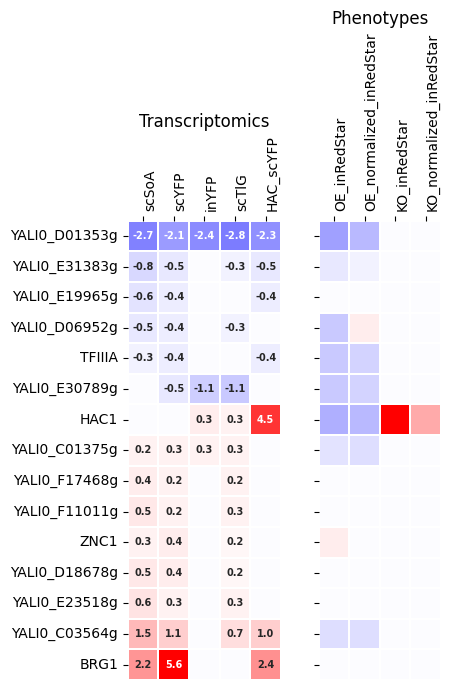

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


# Define the numeric data and row labels
numeric_data1 = uniform_dereg.iloc[:, 4:9]
numeric_data2 = uniform_dereg.iloc[:, 9:13]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(uniform_dereg['Assigned name'], uniform_dereg['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 7), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_inRedStar': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_normalized_inRedStar': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
    'KO_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF080', 'TF120', 'TF128'],
    'KO_normalized_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF120', 'TF128']
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in uniform_dereg['TF number'].values:
            annot_data2.loc[uniform_dereg['TF number'] == gene, column] = numeric_data2.loc[uniform_dereg['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
#plt.savefig('subheatmap_uniform.png')
